<a href="https://colab.research.google.com/github/githubtaniya924/Data-Analysis-Internship/blob/main/Paired_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary paired test

In [ ]:
import numpy as np
import pandas as pd

before = np.array([0,0,0,0,1,1,0,1,1,0])
after = np.array([1,1,1,1,1,1,1,0,0,1])

In [ ]:
data = pd.DataFrame(
    {
        'before' : before,
        'after' : after
    }
)
crosstab = pd.crosstab(data['before'],data['after'])
crosstab


after,0,1
before,,
0,0,6
1,2,2


In [ ]:
from statsmodels.stats.contingency_tables import mcnemar
print(mcnemar(crosstab, exact=True,correction=False))

pvalue      0.2890625
statistic   2.0


In [ ]:
pvalue = 0.2890625
if(pvalue < 0.05):
  print('There is a significant difference before and after the test')
else:
  print('There is no significant difference before and after the test')

There is no significant difference before and after the test


In [ ]:
#effect size
a = 6 #before 0 after 1
b = 2 #before 1 after 0

cohen_h = (a-b)**2/(a+b)
cohen_h

2.0

In [ ]:
if(cohen_h < 0.2):
  print('There is a small effect size')
elif(cohen_h < 0.5):
  print('There is a medium effect size')
else:
  print('There is a large effect size')

There is a large effect size


In [ ]:
#There is no significant difference before and after the event as pre the mcnemar test (pvalue> 0.05)
#There is a large effect size (cohen_h - 2.0)

## Paired Test for Nominal data

In [ ]:
category = ['cat','dog','parrot','snake']
before1 = np.random.choice(category,size=50)
after1 = np.random.choice(category,size=50)

In [ ]:
data1 = pd.DataFrame(
    {
        'before': before1,
        'after': after1
    }
)

In [ ]:
crosstab1= pd.crosstab(data1['before'],data1['after'])
crosstab1

after,cat,dog,parrot,snake
before,,,,
cat,1,4,0,4
dog,2,4,6,7
parrot,0,2,5,2
snake,2,4,3,4


In [ ]:
from statsmodels.stats.api import SquareTable
print(SquareTable(crosstab1,shift_zeros=False). homogeneity(method = 'bhapkar'))

df          3
pvalue      0.2092128353424344
statistic   4.534735187186792


In [ ]:
pvalue = 0.2092128353424344
if(pvalue < 0.05):
  print('There is a significant difference before and after the event')
else:
  print('There is no significant difference before and after the event')

#there is no proper effect size test

There is no significant difference before and after the event


## Paired Test on Ordinal Data

In [ ]:
before2 = np.random.randint(1,5,size=20)
after2 = np.random.randint(1,5,size=20)

In [ ]:
data2= pd.DataFrame(
    {
        'before': before2,
        'after': after2
    }
)

In [ ]:
crosstab2 = pd.crosstab(data2['before'],data2['after'])
crosstab2

after,1,2,3,4
before,,,,
1,0,0,3,2
2,1,3,0,2
3,1,3,0,0
4,1,0,2,2


In [ ]:
from scipy.stats import wilcoxon
wilcoxon(data2['before'],data2['after'],correction=False)

WilcoxonResult(statistic=44.5, pvalue=0.3714415417218295)

In [ ]:
pvalue=0.3714415417218295
if(pvalue < 0.05):
  print('There is a significant difference before and after the event')
else:
  print('There is no significant difference before and after the event')

There is no significant difference before and after the event


In [ ]:
#effect size - rosenthal correlation coefficient

from scipy.stats import norm

z_value = norm.ppf(1-(pvalue/2))

import math
r_corr = abs(z_value / math.sqrt(data2.shape[0]))
r_corr

0.19985447739874596

In [ ]:
if(r_corr < 0.2):
  print('small')
elif(r_corr < 0.5):
  print('medium')
elif(r_corr < 0.8):
  print('large')
else:
  print('very large')


small


## Paired Test on Nominal Data

In [ ]:
import matplotlib.pyplot as plt

before3 = np.random.normal(loc=70,scale=10,size=50)

after3 = np.random.normal(loc=30,scale=20,size=50)

In [ ]:
data3 = pd.DataFrame(
    {
        'before': before3,
        'after': after3
    }
)
data3.head()

,before,after
0,62.089504,49.783593
1,62.677899,58.893634
2,71.001805,11.176940
3,62.020178,-2.233090
4,70.881596,9.715007


In [ ]:
data3.describe()

,before,after
count,50.000000,50.000000
mean,68.094501,30.155048
std,8.646761,18.758007
min,51.839443,-5.840678
25%,61.490667,16.128747
50%,67.521312,31.483252
75%,74.979310,42.299016
max,96.123591,71.452253


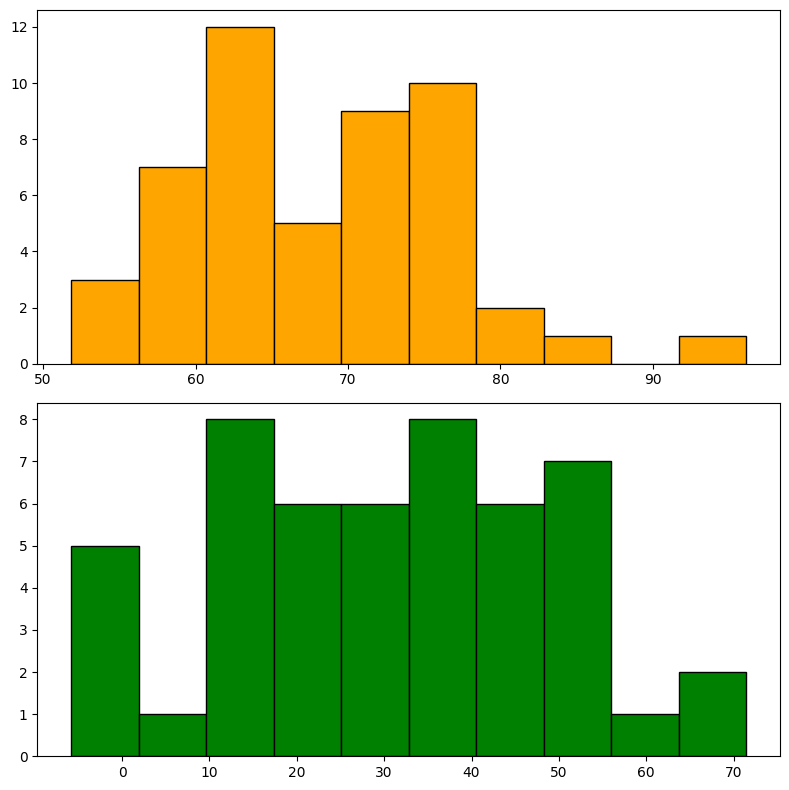

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(8,8))
ax[0].hist(data3['before'],bins=10, color='orange', edgecolor='black')
ax[1].hist(data3['after'],bins=10, color='green', edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import ttest_rel
ttest_rel(data3['before'],data3['after'])

TtestResult(statistic=12.504985719499507, pvalue=7.304523564847148e-17, df=49)

In [ ]:
pvalue=7.304523564847148e-17
if(pvalue < 0.05):
  print('There is a significant difference before and after the event')
else:
  print('There is no significant difference before and after the event')

There is a significant difference before and after the event


In [ ]:
#effect size
!pip install researchpy
import researchpy as rp
rp.ttest(data3['before'],data3['after'])

In [ ]:
d = 2.5977

cohen_d = d* (2**0.5)

if(cohen_d < 0.2):
  print('small')
elif(cohen_d < 0.5):
  print('medium')
elif(cohen_d < 0.8):
  print('large')
else:
  print('very large')
cohen_d

very large


3.6737025709765896